In [1]:
%matplotlib notebook
from omegaconf import DictConfig, OmegaConf
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
import gym
import numpy as np
from hydra.core.hydra_config import HydraConfig
from mbrl.third_party.pytorch_sac_pranz24.sac_reg_norm import SAC_REG
from mbrl.util.logger import Logger
from mbrl.util.replay_buffer import ReplayBuffer
import mbrl.constants
import matplotlib.pyplot as plt
initialize(version_base=None, config_path="./config")

hydra.initialize()

In [2]:
cfg=compose(config_name="config.yaml")

In [9]:
env = gym.make('gym_custom:' + cfg.sim_config.name, cfg = cfg.sim_config)
agent = SAC_REG(env.observation_space.shape[0], env.action_space, cfg.train_config.algorithm)
agent.load_checkpoint("logs/Full_Act_Cartpole_Agent.pt")

Loading models from logs/Full_Act_Cartpole_Agent.pt


In [ ]:
states = []
rewards = []
u = np.zeros((2,1))
# u[1,0] = -1
state = env.reset(init_state=np.array([[0.75, np.pi, 0, 0]]).T)
print(state)
done =  False
for i in range(10000):
    u = agent.select_action(state, evaluate= True)
    state, reward, done, info = env.step(u)
    states.append(state)
    rewards.append(reward)
    if done: 
        break
states = np.array(states)
rewards = np.array(rewards)

<IPython.core.display.Javascript object>


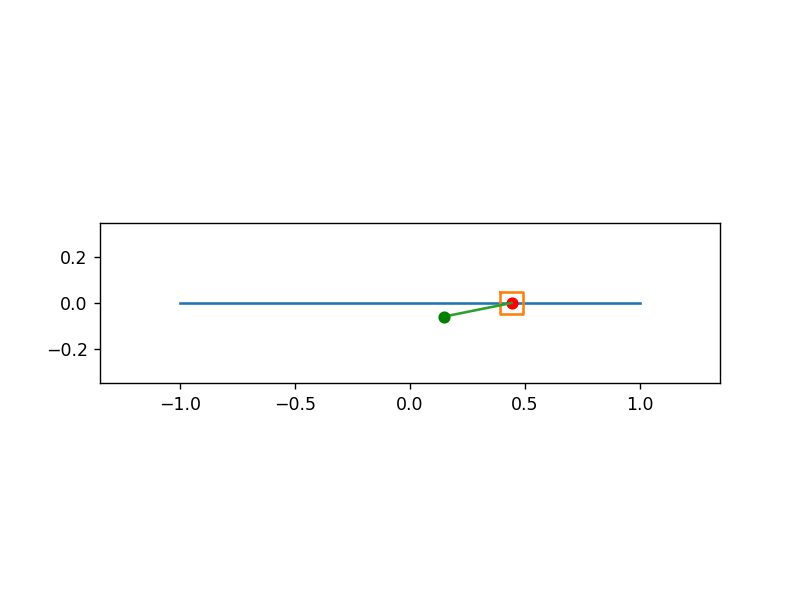

In [13]:
env.animate(states)
    

In [12]:
states.shape

(3000, 6)

In [ ]:
plt.figure(200)
plt.plot(states[:,5])